In [2]:
g = 0.1 if test == 0 else 10 / test
g

0.1

In [1]:
test = 0
g = 10/test if test == 0 else 0.1
g

ZeroDivisionError: division by zero

In [1]:
from preprocess_all_data import discover_all_recordings

DATA_DIRECTORY = "/home/swolf/asim_shared/raw_data/ds005873-1.1.0"
recs = discover_all_recordings(DATA_DIRECTORY)

Found 125 subjects
  Found: sub-001 run-03
  Found: sub-001 run-07
  Found: sub-001 run-01
  Found: sub-001 run-05
  Found: sub-001 run-04
  Found: sub-001 run-06
  Found: sub-001 run-09
  Found: sub-001 run-02
  Found: sub-001 run-08
  Found: sub-012 run-09
  Found: sub-012 run-06
  Found: sub-012 run-04
  Found: sub-012 run-01
  Found: sub-012 run-08
  Found: sub-012 run-07
  Found: sub-012 run-05
  Found: sub-012 run-03
  Found: sub-012 run-10
  Found: sub-012 run-02
  Found: sub-071 run-35
  Found: sub-071 run-28
  Found: sub-071 run-22
  Found: sub-071 run-29
  Found: sub-071 run-38
  Found: sub-071 run-25
  Found: sub-071 run-14
  Found: sub-071 run-31
  Found: sub-071 run-26
  Found: sub-071 run-24
  Found: sub-071 run-10
  Found: sub-071 run-21
  Found: sub-071 run-08
  Found: sub-071 run-09
  Found: sub-071 run-16
  Found: sub-071 run-05
  Found: sub-071 run-34
  Found: sub-071 run-36
  Found: sub-071 run-20
  Found: sub-071 run-11
  Found: sub-071 run-33
  Found: sub-071 run-

In [5]:
for rec in recs:
    # print(list(rec))
    annotations = Annotation.loadAnnotation(DATA_DIRECTORY, rec)
    if len(annotations.events)>1:
        print(f"{rec=}")
        print(len(annotations.events))

NameError: name 'Annotation' is not defined

In [ ]:
for subject, runs in grouped_recs.items():
    # print(f"Subject: {subject}")
    true_positives_sub = []
    false_positives_sub = []
    hours_sub = []
    total_events_sub = []

    for run in runs:
        # print(f"  - Run: {run}")
        mp_filename = f"mp_{subject}_{run}.pkl"
        with open(os.path.join(MPs_path, mp_filename), "rb") as f:
            mps_list.append(pickle.load(f)[:, 0].reshape(-1, 1))
        with open(os.path.join(DIR_preprocessed, mp_filename[3:-4]+"_preprocessed.pkl"), "rb") as g:
            label_list.append(pickle.load(g)["channels"][0]["labels"][0])

In [3]:
recs[0]

('sub-001', 'run-03')

In [1]:
import pandas as pd

In [3]:
pd.read_excel("/home/jhagenbe_sw/ASIM/ecg-seizure-detection/MatrixProfile/hp_tuning_mp_results.xlsx")

,amount_of_annomalies_per_record,amount_of_records,batch_size_load,downsample_freq,max_gap_annos_in_sec,n_cons,window_size_sec,pre_thresh_sec,post_thresh_sec,verbose,DIR_preprocessed,MPs_path,sensitivity,false_alarms_per_hour,overview
0,125,59,100,8,2,5,25,300,180,True,/home/swolf/asim_shared/preprocessed_data/down...,/home/swolf/asim_shared/results/MP/downsample_...,0,0,"{'# TP': 0, '# FP': 0, '# Total seizures': 0}"
1,250,59,100,8,2,5,25,300,180,True,/home/swolf/asim_shared/preprocessed_data/down...,/home/swolf/asim_shared/results/MP/downsample_...,0,0,"{'# TP': 0, '# FP': 0, '# Total seizures': 0}"
2,125,59,100,8,2,5,25,300,180,True,/home/swolf/asim_shared/preprocessed_data/down...,/home/swolf/asim_shared/results/MP/downsample_...,0,0,"{'# TP': 0, '# FP': 0, '# Total seizures': 0}"
3,250,59,100,8,2,5,25,300,180,True,/home/swolf/asim_shared/preprocessed_data/down...,/home/swolf/asim_shared/results/MP/downsample_...,0,0,"{'# TP': 0, '# FP': 0, '# Total seizures': 0}"


In [3]:
import os
downsample_freq = 8
window_size_sec = 25
MPs_path = f"/home/swolf/asim_shared/results/MP/downsample_freq={downsample_freq},no_windows/seq_len{window_size_sec}sec"

mps_filenames = [filename for filename in os.listdir(MPs_path) if filename.endswith(".pkl")]


In [ ]:
from collections import defaultdict
from classes.data import Data
from classes.annotation import Annotation
mps_filenames = [filename for filename in os.listdir(MPs_path) if filename.endswith(".pkl")]
# removing "mp_" prefix and .pkl "suffix"
recs = [tuple(mp_filename[3:-4].split("_")) for mp_filename in mps_filenames][:30]
# Create a dictionary where each subject is a key and values are lists of runs
mps_list = []
grouped_recs = defaultdict(list)

# Populate the dictionary
for subject, run in recs:
    grouped_recs[subject].append(run)

grouped_recs = dict(grouped_recs)

# Iterate over grouped_recs in insertion order
loaded_recs = 0
amount_of_records = 3000
events = 0
for subject, runs in grouped_recs.items():
    true_positives_sub = []
    false_positives_sub = []
    hours_sub = []
    total_events_sub = []

    for run in runs:
        rec = ((subject), (run))
        mp_filename = f"mp_{subject}_{run}.pkl"
        annotations = Annotation.loadAnnotation(DATA_DIRECTORY, rec)
        if len(annotations.events)>0:
            events += len(annotations.events)
        loaded_recs += 1
        if loaded_recs == amount_of_records:
            break
    if loaded_recs == amount_of_records:
        break
print(f"{events=}")
print(loaded_recs)

NameError: name 'os' is not defined

In [ ]:
import pickle
downsample_freq = 8
window_size_sec = 25
DIR_preprocessed: f"/home/swolf/asim_shared/preprocessed_data/downsample_freq={downsample_freq},no_windows"

In [2]:
[1,2][:3]

[1, 2]

In [7]:
amount_of_records = 10
mps_filenames = [filename for filename in os.listdir(MPs_path) if filename.endswith(".pkl")]
# removing "mp_" prefix and .pkl "suffix"
recs = [tuple(mp_filename[3:-4].split("_")) for mp_filename in mps_filenames][:amount_of_records]

mps_list = []
label_list = []

# True positives for responder
resp_tp_list = []
resp_fp_list = []
resp_total_events_list = []
resp_hours_list = []

# True positives for both
tp_list = []
fp_list = []

hours_list = []
total_events_list = []

# Create a dictionary where each subject is a key and values are lists of runs
grouped_recs = defaultdict(list)

# Populate the dictionary
for subject, run in recs:
    grouped_recs[subject].append(run)

grouped_recs = dict(grouped_recs)

# Iterate over grouped_recs in insertion order
loaded_recs = 0
for subject, runs in grouped_recs.items():
    true_positives_sub = []
    false_positives_sub = []
    hours_sub = []
    total_events_sub = []

    for run in runs:
        mp_filename = f"mp_{subject}_{run}.pkl"
        with open(os.path.join(MPs_path, mp_filename), "rb") as f:
            mps_list.append(pickle.load(f)[:, 0].reshape(-1, 1))
        with open(os.path.join(DIR_preprocessed, mp_filename[3:-4]+"_preprocessed.pkl"), "rb") as g:
            label_list.append(pickle.load(g)["channels"][0]["labels"][0])
        print(len(mps_list[0]))
        annomaly_indices = [MatrixProfile.get_top_k_anomaly_indices(matrix_profile=mp.flatten(), k=amount_of_annomalies_per_record)
                    for mp in mps_list]
        annomaly_indices_cons = [MatrixProfile.mean_of_all_consecutive_anomalies(indices=annos, n=n_cons, max_gap = downsample_freq*max_gap_annos_in_sec)
                        for annos in annomaly_indices]
        true_positives, false_positives, hours, total_events = compute_sensitivity_false_alarm_rate_timing_tolerance(
            label_sequences=label_list, detection_indices=annomaly_indices_cons, lower=pre_thresh_sec, upper=post_thresh_sec, frequency=downsample_freq
            )
        true_positives_sub.append(true_positives)
        false_positives_sub.append(false_positives)
        hours_sub.append(hours)
        total_events_sub.append(total_events)
        loaded_recs += 1

        if loaded_recs%batch_size_load ==0:
            if verbose: 
                print(loaded_recs)
            if not len(label_list)==len(mps_list):
                print(f"len(label_list) not ==len(mps_list)")
        mps_list = []
        label_list = []
    responder_rate = 0.0 if sum(total_events_sub) == 0 else sum(true_positives_sub) / sum(total_events_sub)
    if responder_rate >= 0.66:
        resp_tp_list.append(sum(true_positives_sub))
        resp_fp_list.append(sum(false_positives_sub))
        resp_total_events_list.append(sum(total_events_sub))
        resp_hours_list.append(sum(hours_sub))
    
    tp_list.append(sum(true_positives_sub))
    fp_list.append(sum(false_positives_sub))
    hours_list.append(sum(hours_sub))
    total_events_list.append(sum(total_events_sub))

sensitivity = 0.0 if sum(total_events_list) == 0 else sum(tp_list) / sum(total_events_list)
resp_sensitivity = 0.0 if sum(resp_total_events_list) == 0 else sum(resp_tp_list) / sum(resp_total_events_list)
resp_false_alarms_per_hour = 0.0 if sum(resp_hours_list) == 0 else sum(resp_fp_list) / sum(resp_hours_list)
false_alarms_per_hour = 0.0 if sum(hours_list) == 0 else sum(fp_list) / sum(hours_list)

false_alarms_per_hour = sum(fp_list)/sum(hours_list) if sum(hours_list) > 0 else 0.0
overview = {"# TP":sum(tp_list), "# FP": sum(fp_list), "# Total seizures":sum(total_events_list)}

NameError: name 'DIR_preprocessed' is not defined

In [29]:
recs = [tuple(mp_filename[3:-4].split("_")) for mp_filename in mps_filenames]

In [30]:
recs

[('sub-083', 'run-22'),
 ('sub-052', 'run-04'),
 ('sub-056', 'run-01'),
 ('sub-040', 'run-01'),
 ('sub-084', 'run-26'),
 ('sub-095', 'run-33'),
 ('sub-092', 'run-44'),
 ('sub-123', 'run-37'),
 ('sub-096', 'run-56'),
 ('sub-006', 'run-10'),
 ('sub-070', 'run-01'),
 ('sub-083', 'run-28'),
 ('sub-095', 'run-66'),
 ('sub-086', 'run-13'),
 ('sub-119', 'run-24'),
 ('sub-121', 'run-102'),
 ('sub-075', 'run-36'),
 ('sub-094', 'run-18'),
 ('sub-124', 'run-80'),
 ('sub-104', 'run-06'),
 ('sub-096', 'run-01'),
 ('sub-006', 'run-09'),
 ('sub-089', 'run-82'),
 ('sub-098', 'run-07'),
 ('sub-085', 'run-02'),
 ('sub-033', 'run-03'),
 ('sub-019', 'run-03'),
 ('sub-122', 'run-04'),
 ('sub-033', 'run-04'),
 ('sub-062', 'run-01'),
 ('sub-066', 'run-02'),
 ('sub-095', 'run-103'),
 ('sub-122', 'run-44'),
 ('sub-095', 'run-75'),
 ('sub-070', 'run-22'),
 ('sub-084', 'run-12'),
 ('sub-124', 'run-35'),
 ('sub-093', 'run-37'),
 ('sub-081', 'run-90'),
 ('sub-121', 'run-89'),
 ('sub-034', 'run-11'),
 ('sub-077', '

In [28]:
tuple(mps_filenames[0][3:-4].split("_"))

('sub-083', 'run-22')

In [ ]:
mps_filenames

In [1]:
from preprocessing import ECGPreprocessor

In [ ]:
from pathlib import Path
from typing import List
import pickle
import re
import os
import itertools
import csv
import sys
from typing import Any, Callable, Dict, List
import pandas as pd
from collections import defaultdict

import sys
from pathlib import Path

# Determine project root as the parent of 'pa' folder (adjust according to your structure)
project_root = Path(__file__).resolve().parent.parent  # If g.py is in pa/test, parent.parent ist pa/

if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# Now you can import utils.metrics as if project_root is root of your package
from utils.metrics import compute_sensitivity_false_alarm_rate_timing_tolerance

from matrix_profile import MatrixProfile



def produce_mp_results(amount_of_annomalies_per_record: int, amount_of_records:int, batch_size_load :int, downsample_freq:int, max_gap_annos_in_sec:int, n_cons:int, window_size_sec:int, pre_thresh_sec:int, post_thresh_sec:int, DIR_preprocessed:str, MPs_path:str, verbose:bool):
    mps_filenames = [filename for filename in os.listdir(MPs_path) if filename.endswith(".pkl")]
    # removing "mp_" prefix and .pkl "suffix"
    recs = [tuple(mp_filename[3:-4].split("_")) for mp_filename in mps_filenames]
    
    mps_list = []
    label_list = []

    # True positives for responder
    resp_tp_list = []
    resp_fp_list = []
    resp_total_events_list = []
    resp_hours_list = []


    # # True positives for non-responder
    # non_resp_tp_list = []
    # non_resp_fp_list = []

    # True positives for both
    tp_list = []
    fp_list = []

    hours_list = []
    total_events_list = []

    # Create a dictionary where each subject is a key and values are lists of runs
    grouped_recs = defaultdict(list)

    # Populate the dictionary
    for subject, run in recs:
        grouped_recs[subject].append(run)

    grouped_recs = dict(grouped_recs)

    # Iterate over grouped_recs in insertion order
    loaded_recs = 0
    amount_of_records = 5
    for subject, runs in grouped_recs.items():
        # print(f"Subject: {subject}")
        true_positives_sub = []
        false_positives_sub = []
        hours_sub = []
        total_events_sub = []

        for run in runs:
            # print(f"  - Run: {run}")
            mp_filename = f"mp_{subject}_{run}.pkl"
            with open(os.path.join(MPs_path, mp_filename), "rb") as f:
                mps_list.append(pickle.load(f)[:, 0].reshape(-1, 1))
            with open(os.path.join(DIR_preprocessed, mp_filename[3:-4]+"_preprocessed.pkl"), "rb") as g:
                label_list.append(pickle.load(g)["channels"][0]["labels"][0])


        if loaded_recs == amount_of_records:
            break
        mps_list = []
        label_list = []

    sensitivity = 0.0 if sum(total_events_list) == 0 else sum(tp_list) / sum(total_events_list)
    resp_sensitivity = 0.0 if sum(resp_total_events_list) == 0 else sum(resp_tp_list) / sum(resp_total_events_list)
    resp_false_alarms_per_hour = 0.0 if sum(resp_hours_list) == 0 else sum(resp_fp_list) / sum(resp_hours_list)
    false_alarms_per_hour = 0.0 if sum(hours_list) == 0 else sum(fp_list) / sum(hours_list)

    false_alarms_per_hour = sum(fp_list)/sum(hours_list) if sum(hours_list) > 0 else 0.0
    overview = {"# TP":sum(tp_list), "# FP": sum(fp_list), "# Total seizures":sum(total_events_list)}

    return sensitivity, false_alarms_per_hour, resp_sensitivity, resp_false_alarms_per_hour, overview

def run_grid_search(param_grid: Dict[str, List[Any]],
                    target_function: Callable[..., Dict[str, Any]],
                    save_results: bool = False) -> List[Dict[str, Any]]:
    """
    Executes a grid search over all combinations of parameter values and optionally saves results to CSV.

    Args:
        param_grid (Dict[str, List[Any]]): Parameter grid with possible values for each parameter.
        target_function (Callable): The function to evaluate.
        save_results (bool): Whether to save results to CSV.

    Returns:
        List[Dict[str, Any]]: List of parameter combinations and their results.
    """
    excel_path = "/home/jhagenbe_sw/ASIM/ecg-seizure-detection/MatrixProfile/hp_tuning_mp_results_resp.xlsx"
    keys = list(param_grid.keys())
    combinations = list(itertools.product(*(param_grid[key] for key in keys)))

    for values in combinations:
        params = dict(zip(keys, values))
        print(f"Testing combination: {params}")
        try:
            # result = target_function(**params)
            sensitivity, false_alarms_per_hour, resp_sensitivity, resp_false_alarms_per_hour, overview = target_function(**params)
            combined = {
                **params,
                "sensitivity": sensitivity,
                "false_alarms_per_hour": false_alarms_per_hour,
                "resp_sensitivity":resp_sensitivity,
                "resp_false_alarms_per_hour": resp_false_alarms_per_hour,
                "overview": overview
            }

            if save_results:
                df_row = pd.DataFrame([combined])

                if os.path.isfile(excel_path):
                    # Load existing Excel file and append new row
                    existing_df = pd.read_excel(excel_path)
                    df_combined = pd.concat([existing_df, df_row], ignore_index=True)
                else:
                    df_combined = df_row
                # Write the full DataFrame back to the file
                df_combined.to_excel(excel_path, index=False)


        except Exception as e:
            print(f"Error with parameters {params}: {e}")
            continue


if __name__ == "__main__":
    # Example parameter grid

    downsample_freq = 8
    window_size_sec = 25
    parameter_grid: Dict[str, List[Any]] = {
        "amount_of_annomalies_per_record": [1000, 1200, 1500, 2000, 3000, 4000],
        "amount_of_records": [559], # 2795 * 0.2 => 20% of samples
        "batch_size_load": [100],
        "downsample_freq": [downsample_freq],
        # "max_gap_annos_in_sec": [1, 2, 3, 4, 6, 8, 10],
        "max_gap_annos_in_sec": [10, 15, 20, 25, 30],
        "n_cons": [1, 3, 5, 10, 35],
        "window_size_sec": [window_size_sec],
        "pre_thresh_sec": [60 * 5, 0],
        "post_thresh_sec": [60 * 3, 0],
        "verbose": [False],
        "DIR_preprocessed": [f"/home/swolf/asim_shared/preprocessed_data/downsample_freq={downsample_freq},no_windows"],
        "MPs_path": [f"/home/swolf/asim_shared/results/MP/downsample_freq={downsample_freq},no_windows/seq_len{window_size_sec}sec"]
    }

        # Run grid search with saving enabled
    grid_search_results = run_grid_search(parameter_grid, produce_mp_results, save_results=True)


In [4]:
recs[0]

('sub-001', 'run-03')

In [5]:
from collections import defaultdict

# Create a dictionary where each subject is a key and values are lists of runs
grouped_recs = defaultdict(list)

# Populate the dictionary
for subject, run in recs:
    grouped_recs[subject].append(run)

grouped_recs = dict(grouped_recs)

# Print the result
print(grouped_recs)

{'sub-001': ['run-03', 'run-07', 'run-01', 'run-05', 'run-04', 'run-06', 'run-09', 'run-02', 'run-08'], 'sub-012': ['run-09', 'run-06', 'run-04', 'run-01', 'run-08', 'run-07', 'run-05', 'run-03', 'run-10', 'run-02'], 'sub-071': ['run-35', 'run-28', 'run-22', 'run-29', 'run-38', 'run-25', 'run-14', 'run-31', 'run-26', 'run-24', 'run-10', 'run-21', 'run-08', 'run-09', 'run-16', 'run-05', 'run-34', 'run-36', 'run-20', 'run-11', 'run-33', 'run-27', 'run-06', 'run-13', 'run-39', 'run-12', 'run-23', 'run-17', 'run-32', 'run-04', 'run-18', 'run-01', 'run-37', 'run-07', 'run-30', 'run-19', 'run-02'], 'sub-110': ['run-01', 'run-05', 'run-07', 'run-06', 'run-02', 'run-04', 'run-08', 'run-03'], 'sub-030': ['run-03', 'run-04', 'run-01', 'run-07', 'run-09', 'run-05', 'run-02', 'run-06', 'run-08'], 'sub-083': ['run-29', 'run-48', 'run-59', 'run-61', 'run-05', 'run-54', 'run-18', 'run-09', 'run-10', 'run-55', 'run-24', 'run-16', 'run-38', 'run-39', 'run-44', 'run-27', 'run-46', 'run-19', 'run-49', 'r

In [ ]:
# Iterate over grouped_recs in insertion order
loaded_recs = 0
max_loaded_files = 5
for subject, runs in grouped_recs.items():
    print(f"Subject: {subject}")

    for run in runs:
        print(f"  - Run: {run}")
        loaded_recs += 1
        if loaded_recs == max_loaded_files:
            break

    
    if loaded_recs == max_loaded_files:
        break


Subject: sub-001
  - Run: run-03
  - Run: run-07
  - Run: run-01
  - Run: run-05
  - Run: run-04


In [3]:
from classes.data import Data
from classes.annotation import Annotation

ModuleNotFoundError: No module named 'classes'

In [93]:
recs[0]

('sub-001', 'run-03')

In [91]:
for rec in recs[:3]:
    annotations = Annotation.loadAnnotation(DATA_DIRECTORY, rec)
    print(annotations.events)
    if len(annotations.events)>0:
        print({(annotations.events[0][1]-annotations.events[0][0])*32})

[[57975.0, 58047.0]]
{2304.0}
[[16300.0, 16443.0]]
{4576.0}
[]


In [99]:
len(recs)

2795

In [100]:
for idx, rec in enumerate(recs[2200:]):
    data = Data.loadData(DATA_DIRECTORY, rec, modalities=['ecg'])
    if len(data.data)>1:
        print(f"{rec=}")

    
    if idx%50==0:
        print(idx+2200)

2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750


In [64]:
for rec in recs:
    # print(list(rec))
    annotations = Annotation.loadAnnotation(DATA_DIRECTORY, rec)
    if len(annotations.events)>1:
        print(f"{rec=}")
        print(len(annotations.events))

rec=('sub-012', 'run-03')
2
rec=('sub-110', 'run-08')
2
rec=('sub-030', 'run-03')
2
rec=('sub-030', 'run-04')
2
rec=('sub-030', 'run-05')
3
rec=('sub-079', 'run-17')
2
rec=('sub-079', 'run-14')
3
rec=('sub-079', 'run-12')
2
rec=('sub-079', 'run-07')
2
rec=('sub-079', 'run-01')
2
rec=('sub-052', 'run-07')
3
rec=('sub-052', 'run-05')
3
rec=('sub-042', 'run-04')
2
rec=('sub-042', 'run-08')
3
rec=('sub-102', 'run-01')
2
rec=('sub-007', 'run-03')
2
rec=('sub-072', 'run-12')
4
rec=('sub-072', 'run-22')
2
rec=('sub-072', 'run-16')
2
rec=('sub-072', 'run-17')
5
rec=('sub-072', 'run-18')
4
rec=('sub-021', 'run-04')
3
rec=('sub-056', 'run-02')
3
rec=('sub-056', 'run-04')
6
rec=('sub-056', 'run-05')
2
rec=('sub-056', 'run-03')
2
rec=('sub-022', 'run-06')
2
rec=('sub-022', 'run-04')
3
rec=('sub-011', 'run-03')
2
rec=('sub-039', 'run-06')
17
rec=('sub-039', 'run-01')
12
rec=('sub-039', 'run-04')
22
rec=('sub-039', 'run-02')
2
rec=('sub-039', 'run-09')
20
rec=('sub-036', 'run-01')
3
rec=('sub-077', 

In [94]:
subject_id = "sub-060"
run_id = "run-04"
recording = [subject_id, run_id]

# Load data with ECG modality
data = Data.loadData(DATA_DIRECTORY, recording, modalities=['ecg'])

# Load annotations
annotations = Annotation.loadAnnotation(DATA_DIRECTORY, recording)

In [96]:
len(data.data)

1

In [42]:
annotations.rec_duration 

64979.0

In [66]:
print(len(annotations.events))

11


In [67]:
annotations.events

[[31331.0, 31376.0],
 [31769.0, 31819.0],
 [32112.0, 32183.0],
 [34820.0, 34870.0],
 [36445.0, 36485.0],
 [38627.0, 38672.0],
 [45654.0, 45726.0],
 [49895.0, 49941.0],
 [55567.0, 55618.0],
 [59813.0, 59869.0],
 [60952.0, 61002.0]]

In [43]:
type(annotations.events)

list

In [77]:
annotations.rec_duration

64919.0

In [ ]:
from scripts.data_helpers import load_preprocessed_samples
DATA_DIRECTORY = "/home/jhagenbe_sw/ASIM/ecg-seizure-detection/PP_demo_jh/"
samples, labels = load_preprocessed_samples(data_dir=DATA_DIRECTORY,max_loaded_files=10)


Amount empty or corrupted files 0.


In [80]:
len(samples)

3

In [86]:
labels[0].sum()

4576

In [87]:
for (sample, label) in zip(samples, labels):
    # print(f"{samples=}, {labels=}")
    print(f"{label.sum()}")

4576
0
2304


In [81]:
# import numpy as np

# def generate_signal_array(length: float, frequency: float, intervals: list[list[float]]) -> np.ndarray:
#     """
#     Generates a 1D NumPy array of zeros with specified length and frequency.
#     Regions defined by pairs of float start-end intervals (converted to integer sample indices) are set to 1.

#     Parameters:
#     ----------
#     length : float
#         Total length of the signal in seconds.
#     frequency : float
#         Sampling frequency in Hz.
#     intervals : list[list[float]]
#         A list of [start, end] interval pairs as float values, specifying sample indices (e.g. [[10.0, 20.0], [30.0, 40.0]]).
#         The float values should represent integers (e.g., 10.0, not 10.3).

#     Returns:
#     -------
#     np.ndarray
#         A 1D NumPy array of shape (int(length * frequency),) with 1s in specified intervals.
#     """
#     total_samples = int(length * frequency)
#     signal = np.zeros(total_samples, dtype=int)

#     for pair in intervals:
#         if len(pair) != 2:
#             raise ValueError(f"Each interval must contain exactly two elements. Got: {pair}")
#         start = int(pair[0])*frequency
#         end = int(pair[1])*frequency
#         if not (0 <= start <= end <= total_samples):
#             raise ValueError(f"Invalid interval range: {start} to {end}. Must be within [0, {total_samples}].")
#         signal[start:end] = 1

#     return signal


In [75]:
arr = generate_signal_array(length=100.0, frequency=2, intervals=[[7.0, 10.0], [49.0, 53.0], [95.0, 99.0]])
print(arr.nonzero())  # Gibt die Indizes der Einsen zurück


(array([ 14,  15,  16,  17,  18,  19,  98,  99, 100, 101, 102, 103, 104,
       105, 190, 191, 192, 193, 194, 195, 196, 197]),)


In [109]:
print(np.where(arr == 1))  # Gibt die Indizes der Einsen zurück


(array([ 14,  15,  16,  17,  18,  19,  98,  99, 100, 101, 102, 103, 104,
       105, 190, 191, 192, 193, 194, 195, 196, 197]),)


In [76]:
print(arr)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0]


In [101]:
def z_normalize(signal: np.ndarray) -> np.ndarray:
    """
    Apply global z-score normalization to the signal.

    Parameters:
        signal (np.ndarray): Input time series signal.

    Returns:
        np.ndarray: Z-normalized signal with mean 0 and std 1.
    """
    mean = np.mean(signal)
    std = np.std(signal)
    if std == 0:
        raise ValueError("Standard deviation is zero; cannot normalize.")
    return (signal - mean) / std


In [105]:

def test_z_normalize() -> None:
    """
    Generate synthetic signal, apply z-normalization, and visualize results.
    """
    # Simulated time series with offset and scaling
    np.random.seed(42)
    t = np.linspace(0, 10, 1000)
    original_signal = 3.0 + 2.0 * np.sin(2 * np.pi * 1 * t) + 0.3 * np.random.randn(len(t))

    # Z-normalization
    normalized_signal = z_normalize(original_signal)

    # Compute stats
    orig_mean = np.mean(original_signal)
    orig_std = np.std(original_signal)
    norm_mean = np.mean(normalized_signal)
    norm_std = np.std(normalized_signal)

    # Plot
    fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

    axs[0].plot(t, original_signal, label='Original Signal')
    axs[0].set_title(f'Original Signal (mean={orig_mean:.2f}, std={orig_std:.2f})')
    axs[0].grid(True)

    axs[1].plot(t, normalized_signal, color='orange', label='Z-normalized Signal')
    axs[1].set_title(f'Z-normalized Signal (mean={norm_mean:.2f}, std={norm_std:.2f})')
    axs[1].grid(True)

    plt.xlabel("Time [s]")
    plt.tight_layout()
    plt.show()

    # Also print to console
    print(f"Original mean:     {orig_mean:.4f}, std: {orig_std:.4f}")
    print(f"Normalized mean:   {norm_mean:.4f}, std: {norm_std:.4f}")

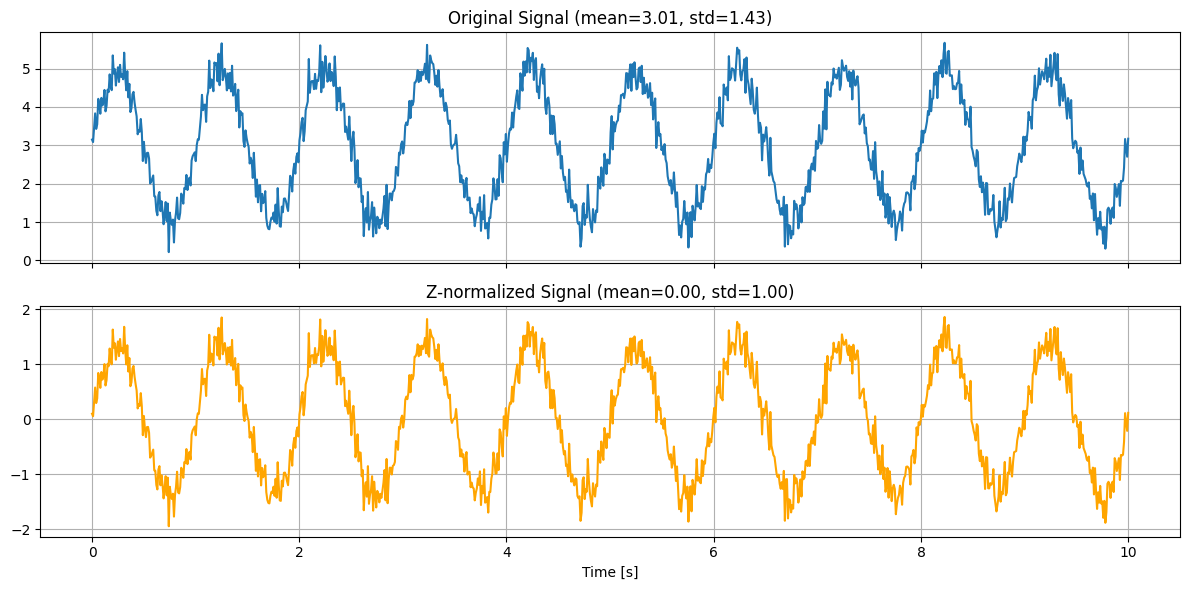

Original mean:     3.0058, std: 1.4329
Normalized mean:   0.0000, std: 1.0000


In [106]:
import matplotlib.pyplot as plt
test_z_normalize()

In [12]:
from pathlib import Path
import os
downsample_freq=8
DATA_DIRECTORY = f"/home/swolf/asim_shared/preprocessed_data/downsample_freq={downsample_freq},no_windows"

In [13]:
filenames = [filename for filename in os.listdir(DATA_DIRECTORY) if filename.endswith("_preprocessed.pkl")]
len(filenames)

2795

In [16]:
filenames[0][:-17]

'sub-092_run-16'

In [12]:
filepath = os.path.join(DATA_DIRECTORY, filenames[0])
filepath

'/home/swolf/asim_shared/preprocessed_data/downsample_freq=8,no_windows/sub-092_run-16_preprocessed.pkl'

In [13]:
import pickle

with open(filepath, 'rb') as file:        
    data = pickle.load(file)


In [18]:
data["channels"][0]

{'channel_name': 'ECG SD',
 'windows': [array([ 6.48425331e+01,  1.43982115e+02,  3.96065503e+01, ...,
         -4.56500993e-01, -1.13961624e-01, -5.05063491e-02])],
 'labels': [array([0, 0, 0, ..., 0, 0, 0])],
 'metadata': [{'start_time': 0,
   'end_time': 3534.0,
   'start_idx': 0,
   'end_idx': 28272.0,
   'sampling_rate': 8}],
 'original_fs': 256,
 'processed_fs': 8,
 'n_windows': 1,
 'n_seizure_windows': array([0, 0, 0, ..., 0, 0, 0])}

In [8]:
from scripts.data_helpers import load_preprocessed_samples, load_one_preprocessed_sample
downsample_freq=8
DATA_DIRECTORY = f"/home/swolf/asim_shared/preprocessed_data/downsample_freq={downsample_freq},no_windows"
samples, labels = load_preprocessed_samples(data_dir=DATA_DIRECTORY,max_loaded_files=1)


/home/swolf/asim_shared/preprocessed_data/downsample_freq=8,no_windows/sub-092_run-16_preprocessed.pkl
Amount empty or corrupted files 0.


In [9]:
samples

[array([ 6.48425331e+01,  1.43982115e+02,  3.96065503e+01, ...,
        -4.56500993e-01, -1.13961624e-01, -5.05063491e-02])]

In [10]:
filepath = '/home/swolf/asim_shared/preprocessed_data/downsample_freq=8,no_windows/sub-092_run-16_preprocessed.pkl'
sample, _ = load_one_preprocessed_sample(filepath=filepath)

In [11]:
sample

[array([ 6.48425331e+01,  1.43982115e+02,  3.96065503e+01, ...,
        -4.56500993e-01, -1.13961624e-01, -5.05063491e-02])]